<a href="https://colab.research.google.com/github/2303a52293/2303a52293_AIML/blob/main/labexam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

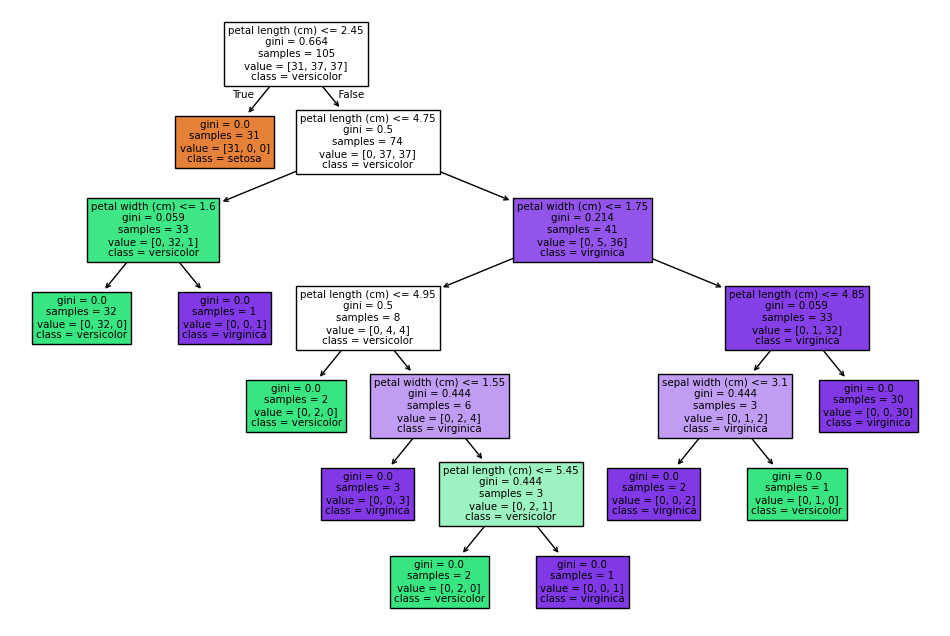

In [5]:
plt.figure(figsize=(12,8))
plot_tree(dt_model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()


In [6]:
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


Accuracy without pruning: 1.0000


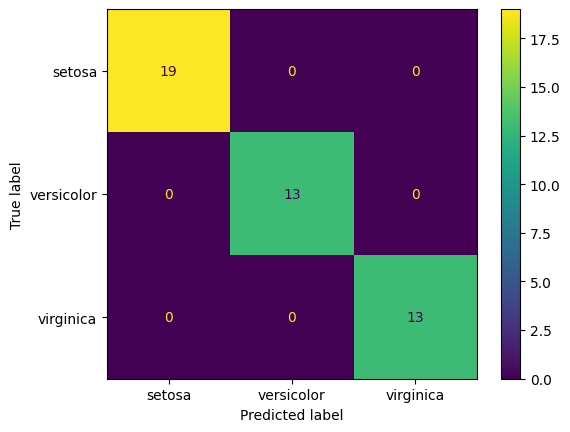

In [7]:
print(f"Accuracy without pruning: {accuracy:.4f}")
ConfusionMatrixDisplay(conf_matrix, display_labels=iris.target_names).plot()
plt.show()



In [8]:
dt_model_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model_pruned.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

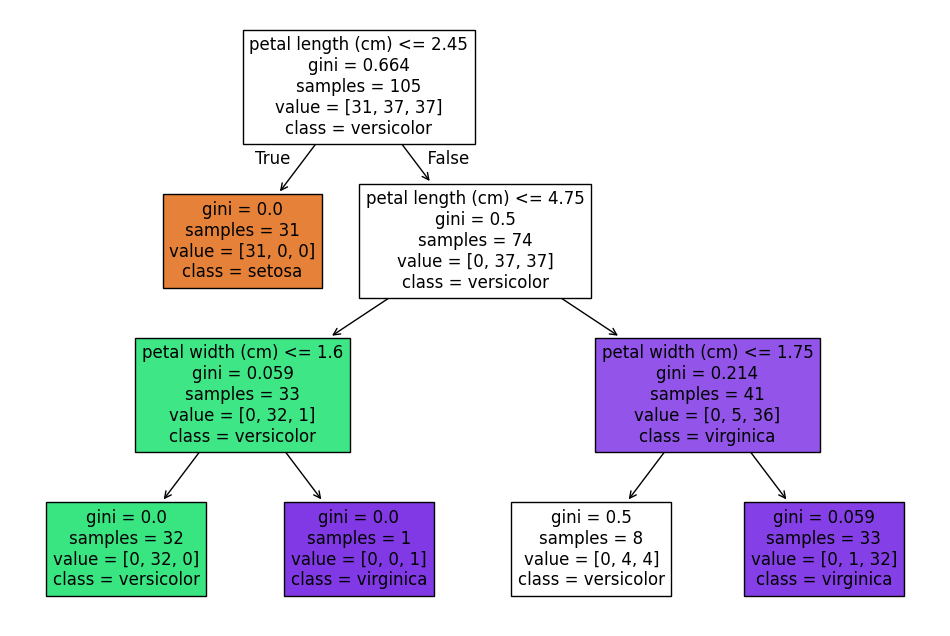

In [9]:
plt.figure(figsize=(12,8))
plot_tree(dt_model_pruned, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()



In [10]:
y_pred_pruned = dt_model_pruned.predict(X_test)
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
conf_matrix_pruned = confusion_matrix(y_test, y_pred_pruned)


Accuracy with pruning (max_depth=3): 1.0000


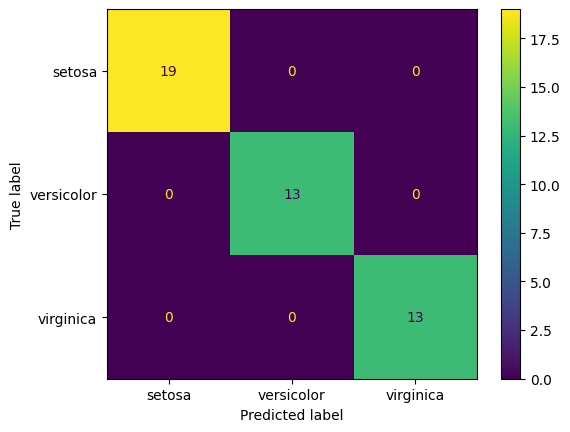

In [11]:
print(f"Accuracy with pruning (max_depth=3): {accuracy_pruned:.4f}")
ConfusionMatrixDisplay(conf_matrix_pruned, display_labels=iris.target_names).plot()
plt.show()


In [12]:
feature_importances = dt_model.feature_importances_
feature_importance_dict = dict(zip(iris.feature_names, feature_importances))
print("Feature importances (without pruning):")
for feature, importance in feature_importance_dict.items():
    print(f"{feature}: {importance:.4f}")


Feature importances (without pruning):
sepal length (cm): 0.0000
sepal width (cm): 0.0191
petal length (cm): 0.8933
petal width (cm): 0.0876


In [13]:
print(f"Accuracy difference: {accuracy - accuracy_pruned:.4f}")

Accuracy difference: 0.0000
